# ML Assignment 4 :-
# Q12 : Spectral Clustering from Scratch

Python Coding Assignment: Spectral Clustering from Scratch

Objective: Implement the Spectral Clustering algorithm from scratch using Python and NumPy. The assignment aims to deepen understanding of spectral clustering concepts and algorithms through hands-on implementation.

Tasks: 

1. Data Generation:

    • Generate synthetic datasets with different shapes (e.g., circles, moons, blobs) using Python libraries such as scikit-learn or NumPy.

2. Similarity Matrix Calculation:

    • Implement a function to calculate the similarity matrix (affinity matrix) using a specified similarity measure (e.g., Gaussian kernel, k-nearest neighbors).3. Normalized Laplacian Matrix:

    • Implement a function to compute the normalized Laplacian matrix from the similarity matrix.

4. Eigenvalue Decomposition:

    • Perform eigenvalue decomposition on the normalized Laplacian matrix to obtain the eigenvectors and eigenvalues.

5. K-Means Clustering:

    • Cluster the eigenvectors obtained from eigenvalue decomposition using the K-Means algorithm.

6. Spectral Clustering Algorithm: 

    • Combine the above components to implement the Spectral Clustering algorithm.

    • Allow for customization of parameters such as the number of clusters, similarity measure, and clustering algorithm.

7. Evaluation Metrics:

    • Implement functions to calculate clustering evaluation metrics such as silhouette score, Davies-Bouldin index, and adjusted Rand index.

8. Experimentation:

    • Apply the implemented Spectral Clustering algorithm to the synthetic datasets generated in step 1.

    • Evaluate the clustering results using the implemented evaluation metrics. 

    • Visualize the clustering results and compare them with ground 
    truth labels (if available). Deliverables:

    • Python script or Jupyter Notebook containing the implementation of Spectral Clustering from scratch.

    • README file explaining the Spectral Clustering algorithm, implementation details, and usage instructions.

    • Visualizations of clustering results and evaluation metrics to demonstrate the effectiveness of the implemented algorithm.

#### Name : Sharanya Dasgupta
#### Roll No. : CS2320

# Blob

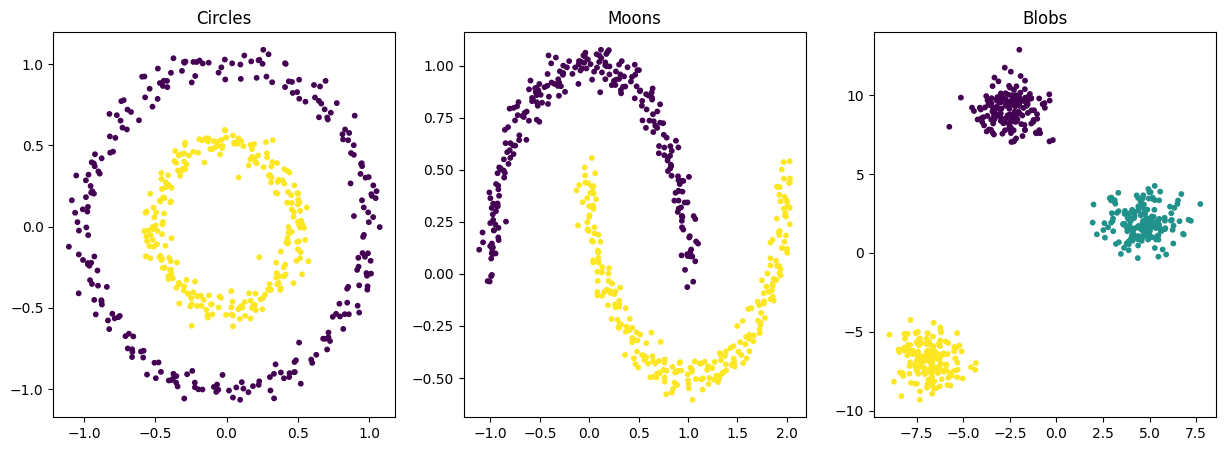

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons, make_blobs

# Generate synthetic datasets
def generate_datasets():
    n_samples = 500
    circles = make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
    moons = make_moons(n_samples=n_samples, noise=0.05)
    blobs = make_blobs(n_samples=n_samples, centers=3, random_state=42)

    return circles, moons, blobs

circles, moons, blobs = generate_datasets()

# Visualize the datasets
datasets = [circles, moons, blobs]
titles = ['Circles', 'Moons', 'Blobs']

plt.figure(figsize=(15, 5))
for i, (dataset, title) in enumerate(zip(datasets, titles)):
    X, y = dataset
    plt.subplot(1, 3, i+1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=10)
    plt.title(title)
plt.show()


In [4]:
# Similarity Matrix Calculation

def rbf_kernel(X, sigma=1.0):
    pairwise_sq_dists = np.square(X[:, np.newaxis] - X[np.newaxis, :]).sum(axis=2)
    K = np.exp(-pairwise_sq_dists / (2 * sigma ** 2))
    return K

X, _ = blobs
similarity_matrix = rbf_kernel(X)
similarity_matrix

array([[1.00000000e+00, 4.05381304e-33, 1.33571012e-51, ...,
        5.92103820e-50, 5.32443720e-02, 3.52691509e-53],
       [4.05381304e-33, 1.00000000e+00, 4.91053292e-06, ...,
        1.39495101e-02, 9.84081028e-33, 1.61016927e-03],
       [1.33571012e-51, 4.91053292e-06, 1.00000000e+00, ...,
        1.91535333e-03, 2.44734187e-55, 1.59956270e-02],
       ...,
       [5.92103820e-50, 1.39495101e-02, 1.91535333e-03, ...,
        1.00000000e+00, 5.68146066e-50, 6.87350332e-01],
       [5.32443720e-02, 9.84081028e-33, 2.44734187e-55, ...,
        5.68146066e-50, 1.00000000e+00, 6.37979854e-54],
       [3.52691509e-53, 1.61016927e-03, 1.59956270e-02, ...,
        6.87350332e-01, 6.37979854e-54, 1.00000000e+00]])

In [5]:
#  Normalized Laplacian Matrix

def normalized_laplacian(W):
    D = np.diag(np.sum(W, axis=1))
    L = D - W
    D_inv_sqrt = np.diag(1.0 / np.sqrt(np.sum(W, axis=1)))
    L_normalized = D_inv_sqrt @ L @ D_inv_sqrt
    return L_normalized

L_normalized = normalized_laplacian(similarity_matrix)
L_normalized

array([[ 9.81070160e-01, -1.43020067e-34, -3.95281199e-53, ...,
        -1.34995639e-51, -8.94573670e-04, -7.79014558e-55],
       [-1.43020067e-34,  9.34246394e-01, -2.70837554e-07, ...,
        -5.92743974e-04, -3.08148159e-34, -6.62839558e-05],
       [-3.95281199e-53, -2.70837554e-07,  9.53736239e-01, ...,
        -6.82680928e-05, -6.42812090e-57, -5.52330254e-04],
       ...,
       [-1.34995639e-51, -5.92743974e-04, -6.82680928e-05, ...,
         9.72540236e-01, -1.14968095e-51, -1.82853655e-02],
       [-8.94573670e-04, -3.08148159e-34, -6.42812090e-57, ...,
        -1.14968095e-51,  9.85087933e-01, -1.25069954e-55],
       [-7.79014558e-55, -6.62839558e-05, -5.52330254e-04, ...,
        -1.82853655e-02, -1.25069954e-55,  9.74227640e-01]])

In [7]:
# Eigenvalue Decomposition

def eigen_decomposition(L, k):
    eigvals, eigvecs = np.linalg.eigh(L)
    return eigvecs[:, :k]

k = 3
eigvecs = eigen_decomposition(L_normalized, k)
eigvecs

array([[ 5.21013356e-13,  7.36591223e-02, -1.02848978e-13],
       [-2.82121247e-02,  1.58761893e-13, -2.94295313e-02],
       [-3.36337364e-02,  1.88848936e-13, -3.50851170e-02],
       ...,
       [-4.36563259e-02,  2.45208820e-13, -4.55401961e-02],
       [ 5.87044546e-13,  8.29910164e-02, -1.15869047e-13],
       [-4.50628326e-02,  2.53108023e-13, -4.70074029e-02]])

In [9]:
# K-Means Clustering

from sklearn.cluster import KMeans

def k_means_clustering(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    return kmeans.labels_

labels = k_means_clustering(eigvecs, k)
labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 2, 1,
       2, 0, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 0, 0, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 1, 0, 0, 2, 1, 1, 0, 2, 0, 0, 1, 2, 0, 2, 0,
       2, 0, 1, 2, 2, 2, 2, 0, 1, 0, 1, 2, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0,
       2, 1, 0, 2, 1, 2, 2, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 1, 2, 2, 0, 2, 1, 2, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 1, 1, 2, 0, 2, 2,
       1, 0, 1, 0, 2, 2, 0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 2, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1,
       0, 2, 1, 1, 0, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 2,
       2, 1, 0, 1, 2, 1, 1, 0, 2, 2, 2, 2, 1, 0, 0, 0, 1, 2, 1, 2, 2, 2,
       1, 1, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       2, 2, 2, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 0, 1,
       2, 0, 2, 2, 0, 1, 1, 1, 0, 1, 0, 2, 2, 1, 2,

In [11]:
# Spectral Clustering Algorithm

def spectral_clustering(X, n_clusters=2, sigma=1.0):
    W = rbf_kernel(X, sigma)
    L = normalized_laplacian(W)
    eigvecs = eigen_decomposition(L, n_clusters)
    labels = k_means_clustering(eigvecs, n_clusters)
    return labels

labels = spectral_clustering(X, k)
labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 0, 0, 0, 2, 2, 0, 1, 1, 0, 2, 0,
       2, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 0, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 0, 1, 1, 2, 0, 0, 1, 2, 1, 1, 0, 2, 1, 2, 1,
       2, 1, 0, 2, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 2,
       2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 2, 1, 2, 2,
       0, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 2, 2, 2, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0,
       1, 2, 0, 0, 1, 1, 2, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 1, 0, 2,
       2, 0, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2, 2,
       0, 0, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       2, 2, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0,
       2, 1, 2, 2, 1, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2,

In [12]:
# Evaluation Metrics

from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score

def evaluate_clustering(X, labels, ground_truth):
    silhouette = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    adjusted_rand = adjusted_rand_score(ground_truth, labels)
    return silhouette, davies_bouldin, adjusted_rand

silhouette, davies_bouldin, adjusted_rand = evaluate_clustering(X, labels, _)
print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Adjusted Rand Index: {adjusted_rand}")

Silhouette Score: 0.8437565906781406
Davies-Bouldin Index: 0.22152502252185613
Adjusted Rand Index: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


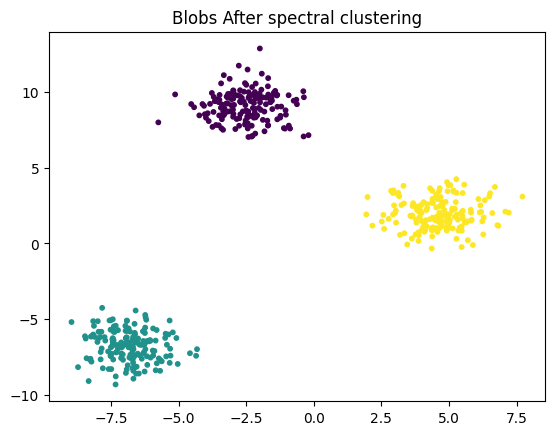

Blobs - Silhouette: 0.8437565906781406, Davies-Bouldin: 0.22152502252185613, Adjusted Rand: 1.0


In [27]:
#  Experimentation

def visualize_clustering(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(title)
    plt.show()


X, y = blobs
labels = spectral_clustering(X, n_clusters=3)
visualize_clustering(X, labels, 'Blobs After spectral clustering')
silhouette, davies_bouldin, adjusted_rand = evaluate_clustering(X, labels, y)
print(f"{title} - Silhouette: {silhouette}, Davies-Bouldin: {davies_bouldin}, Adjusted Rand: {adjusted_rand}")

# Moon

In [25]:
# Similarity Matrix Calculation

from sklearn.neighbors import radius_neighbors_graph

X_mn , y_mn = moons
A_mn = radius_neighbors_graph(X_mn,0.4,mode='distance', metric='minkowski', p=2, metric_params=None, include_self=False)
A_mn = A_mn.toarray()
A_mn

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.1326987 , ..., 0.01676844, 0.        ,
        0.        ],
       [0.        , 0.1326987 , 0.        , ..., 0.13019646, 0.        ,
        0.        ],
       ...,
       [0.        , 0.01676844, 0.13019646, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [19]:
# Laplacian Matrix

from scipy.sparse import csgraph
L_mn = csgraph.laplacian(A_mn, normed=False)
L_mn

array([[12.61461122, -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       [-0.        , 13.93464651, -0.1326987 , ..., -0.01676844,
        -0.        , -0.        ],
       [-0.        , -0.1326987 , 14.11326325, ..., -0.13019646,
        -0.        , -0.        ],
       ...,
       [-0.        , -0.01676844, -0.13019646, ..., 14.02182212,
        -0.        , -0.        ],
       [-0.        , -0.        , -0.        , ..., -0.        ,
        11.76334643, -0.        ],
       [-0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , 13.5331026 ]])

In [20]:
# Eigenvalue Decomposition

eigval_mn, eigvec_mn = np.linalg.eig(L_mn)

In [21]:
# the second smallest eigenvalue

np.where(eigval_mn == np.partition(eigval_mn, 1)[1])

(array([1]),)

In [22]:
# Assigning Clusters - if eig_val(x) = +ve --> cluster 1 and if eig_val(x) = -ve --> cluster 0

y_spec_mn =eigvec_mn[:,1].copy()
y_spec_mn[y_spec_mn < 0] = 0
y_spec_mn[y_spec_mn > 0] = 1

Blobs - Silhouette: 0.49003213945756363, Davies-Bouldin: 0.7780114297105583, Adjusted Rand: 0.24849400004838554


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


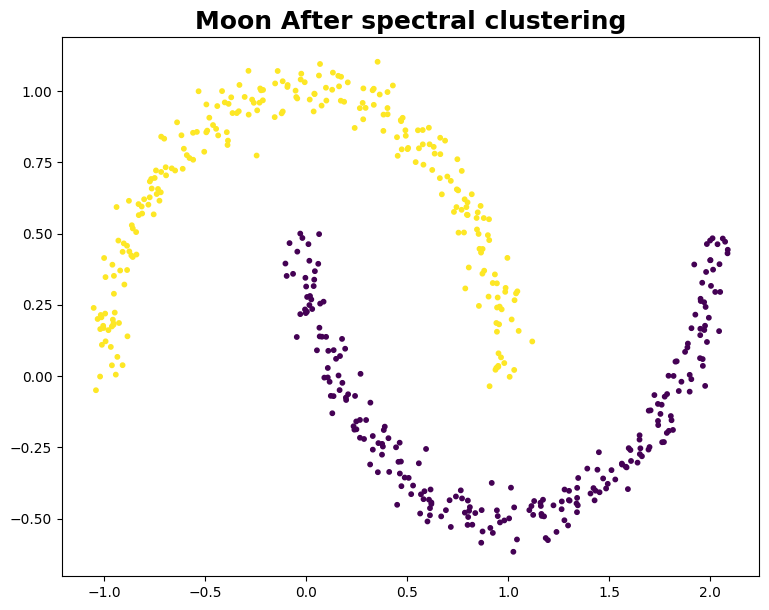

In [26]:
#  Visualization

labels = spectral_clustering(X_mn, n_clusters=2)
silhouette, davies_bouldin, adjusted_rand = evaluate_clustering(X_mn, labels, y_mn)
print(f"{title} - Silhouette: {silhouette}, Davies-Bouldin: {davies_bouldin}, Adjusted Rand: {adjusted_rand}")

fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Moon After spectral clustering', fontsize=18, fontweight='demi')
ax.scatter(X_mn[:, 0], X_mn[:, 1],c=y_spec_mn ,s=10, cmap='viridis')

# Circles -

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


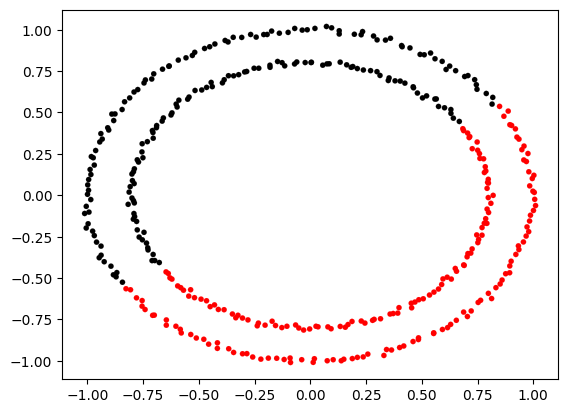

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


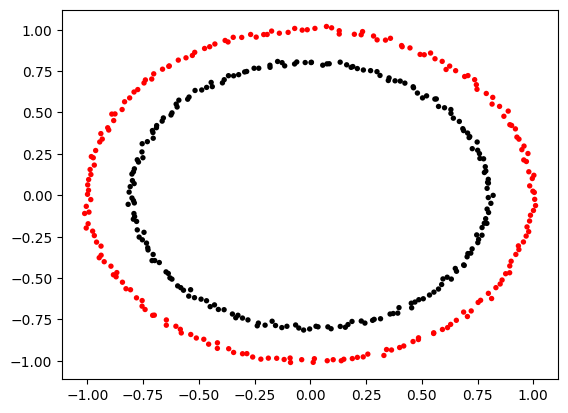

In [33]:
import sklearn.cluster as skl_cluster
import sklearn.datasets as skl_data

circles, circles_clusters = skl_data.make_circles(n_samples=400, noise=.01, random_state=0)

# cluster with kmeans
Kmean = skl_cluster.KMeans(n_clusters=2)
Kmean.fit(circles)
clusters = Kmean.predict(circles)

# plot the data, colouring it by cluster
plt.scatter(circles[:, 0], circles[:, 1], s=15, linewidth=0.1, c=clusters,cmap='flag')
plt.show()

# cluster with spectral clustering
model = skl_cluster.SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(circles)
plt.scatter(circles[:, 0], circles[:, 1], s=15, linewidth=0, c=labels, cmap='flag')
plt.show()

# Spectral Clustering from Scratch

## Introduction

Spectral Clustering is a powerful clustering technique that leverages the eigenvalues (spectrum) of a similarity matrix to perform dimensionality reduction before applying a clustering algorithm such as K-Means. This method is particularly useful for clustering non-linearly separable data.

## Implementation Details

1. **Data Generation**: Synthetic datasets with different shapes (circles, moons, blobs) are generated using scikit-learn.
2. **Similarity Matrix Calculation**: The similarity (affinity) matrix is calculated using different kernels.
3. **Normalized Laplacian Matrix**: The normalized Laplacian matrix is computed from the similarity matrix.
4. **Eigenvalue Decomposition**: Eigenvalue decomposition is performed on the normalized Laplacian matrix to obtain the eigenvectors.
5. **K-Means Clustering**: The eigenvectors obtained from eigenvalue decomposition are clustered using the K-Means algorithm.
6. **Spectral Clustering Algorithm**: The above components are combined to implement the Spectral Clustering algorithm, allowing customization of parameters such as the number of clusters and similarity measure.
7. **Evaluation Metrics**: Functions to calculate clustering evaluation metrics such as Silhouette Score, Davies-Bouldin Index, and Adjusted Rand Index are implemented.
8. **Experimentation**: The implemented Spectral Clustering algorithm is applied to the synthetic datasets, and the results are evaluated and visualized.

## Data Generation

The following synthetic datasets are generated using scikit-learn:
- **Circles**: Two interlocking circles.
- **Moons**: Two interlocking moons.
- **Blobs**: Three Gaussian blobs.
